In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [17]:
df=pd.read_csv('mall customers.csv')

In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.drop(['CustomerID','Gender'],axis=1,inplace=True)

In [20]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [21]:
df.rename(columns={'Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [24]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [26]:
df.shape

(200, 3)

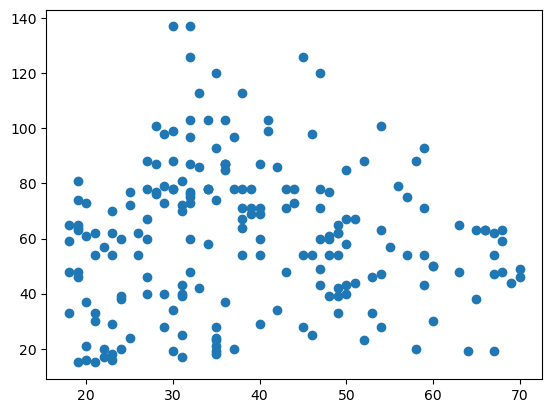

In [27]:
plt.scatter(df.age,df.income)

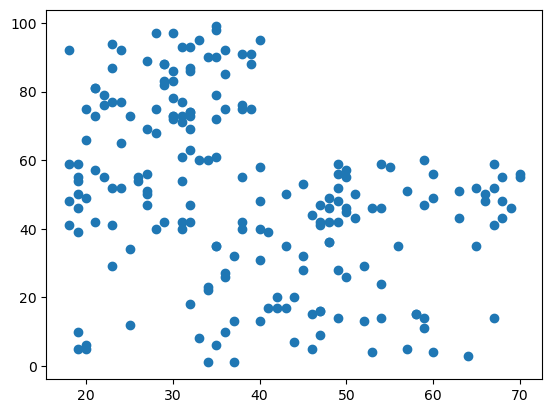

In [28]:
plt.scatter(df.age,df.score)

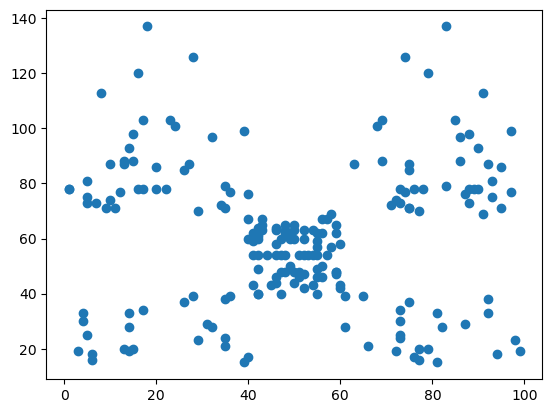

In [29]:
plt.scatter(df.score,df.income)

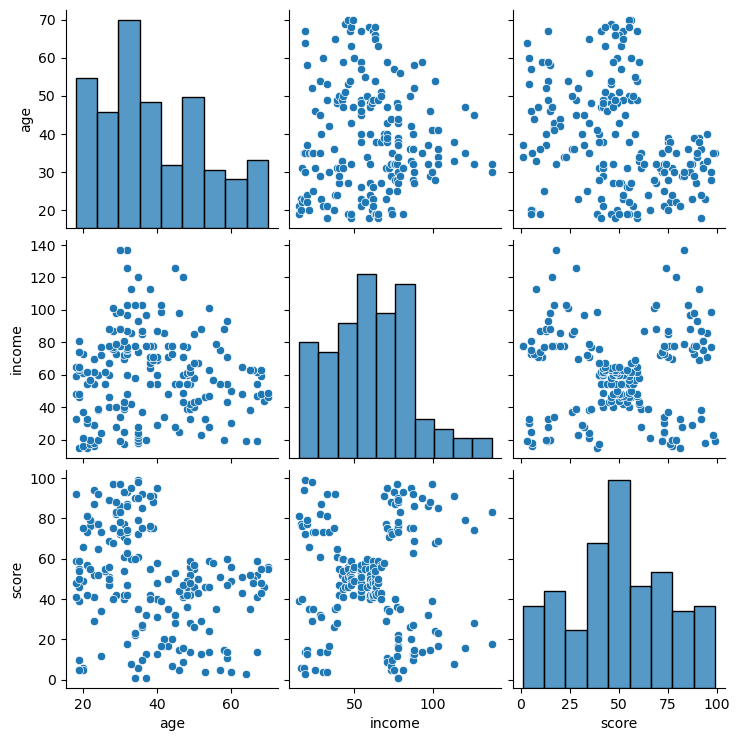

In [33]:
import seaborn as sns
sns.pairplot(df[['age','income','score']])
plt.savefig("image.png")

# KMEANS CLUSTER

Text(0.5, 1.0, 'income and score plot of customers')

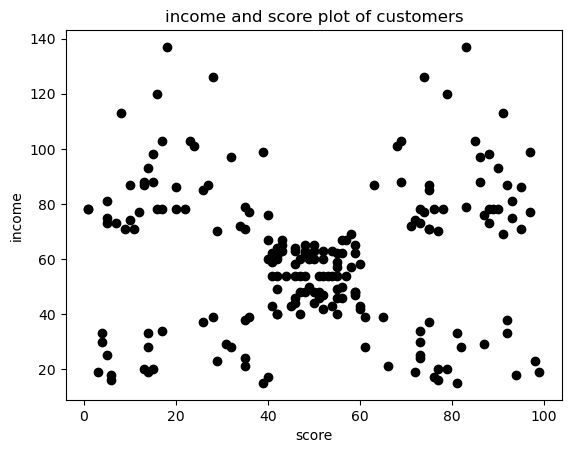

In [35]:
plt.scatter(df.score,df.income,color='black')
plt.xlabel('score')
plt.ylabel('income')
plt.title('income and score plot of customers')


In [36]:
from sklearn.cluster import KMeans

In [41]:
km=KMeans() # click shit + tab & default number of cluster : 8

In [42]:
km.fit_predict(df[['score','income']]) # tarining model

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 1, 2, 5, 2, 1, 2, 1, 2,
       5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 5, 2, 1, 2, 5, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7])

In [43]:
km.fit(df[['score','income']]) 

KMeans()

In [52]:
df['Group1']=km.predict(df[['score','income']])
df.head()

,age,income,score,Group 1,Group1
0,19,15,39,1,1
1,21,15,81,5,5
2,20,16,6,1,1
3,23,16,77,5,5
4,31,17,40,1,1


In [40]:
km.cluster_centers_

array([[ 14.29166667,  79.70833333],
       [ 48.24528302,  61.30188679],
       [ 81.        ,  24.95      ],
       [ 82.17241379,  78.55172414],
       [ 19.52380952,  25.14285714],
       [ 82.        , 109.7       ],
       [ 22.        , 109.7       ],
       [ 51.12121212,  43.96969697]])

In [53]:
df0 = df[df.Group1 == 0]
df1 = df[df.Group1 == 1]
df2 = df[df.Group1 == 2]
df3 = df[df.Group1 == 3]
df4 = df[df.Group1 == 4]
df5 = df[df.Group1 == 5]
df6 = df[df.Group1 == 6]
df7 = df[df.Group1 == 7]

In [54]:
df0.head()

,age,income,score,Group 1,Group1
74,59,54,47,0,0
77,40,54,48,0,0
79,49,54,42,0,0
82,67,54,41,0,0
83,46,54,44,0,0


In [55]:
df1.head()

,age,income,score,Group 1,Group1
0,19,15,39,1,1
2,20,16,6,1,1
4,31,17,40,1,1
6,35,18,6,1,1
8,64,19,3,1,1


In [56]:
df2.head()

,age,income,score,Group 1,Group1
180,37,97,32,2,2
182,46,98,15,2,2
184,41,99,39,2,2
186,54,101,24,2,2
188,41,103,17,2,2


In [57]:
centroid= km.cluster_centers_
centroid

array([[ 47.29166667,  62.58333333],
       [ 19.52380952,  25.14285714],
       [ 22.        , 109.7       ],
       [ 51.51282051,  45.51282051],
       [ 81.89285714,  78.03571429],
       [ 81.        ,  24.95      ],
       [ 13.39130435,  79.73913043],
       [ 82.72727273, 108.18181818]])

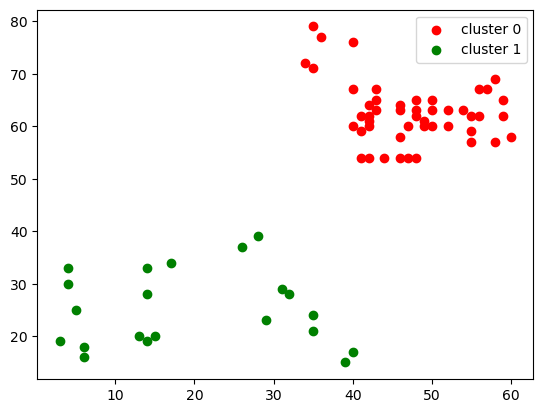

In [60]:
plt.scatter(df0.score,df0.income,color='Red',label='cluster 0')
plt.scatter(df1.score,df1.income,color='Green',label='cluster 1')
plt.legend()

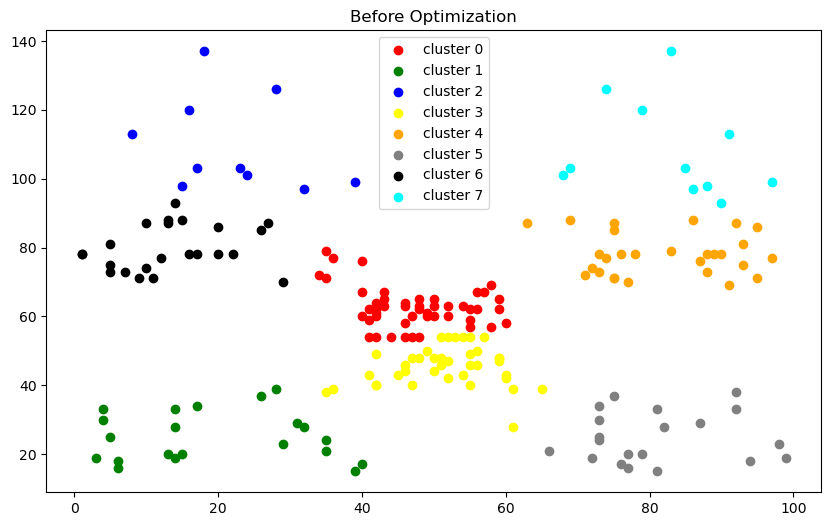

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(df0.score,df0.income,color='Red',label='cluster 0')
plt.scatter(df1.score,df1.income,color='Green',label='cluster 1')
plt.scatter(df2.score,df2.income,color='blue',label='cluster 2')
plt.scatter(df3.score,df3.income,color='yellow',label='cluster 3')
plt.scatter(df4.score,df4.income,color='orange',label='cluster 4')
plt.scatter(df5.score,df5.income,color='grey',label='cluster 5')
plt.scatter(df6.score,df6.income,color='black',label='cluster 6')
plt.scatter(df7.score,df7.income,color='cyan',label='cluster 7')
plt.title('Before Optimization')
plt.legend()

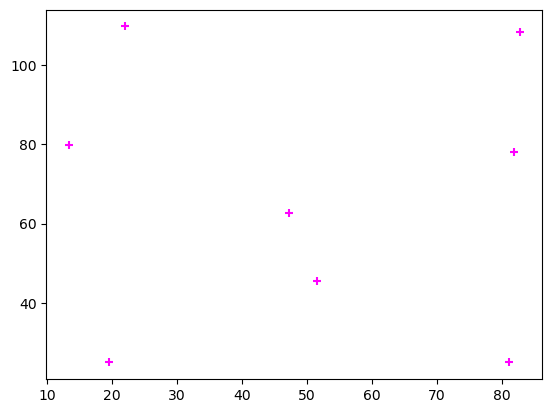

In [66]:
plt.scatter(centroid[:,0],centroid[:,1], color='magenta',marker='+',label='centroid')

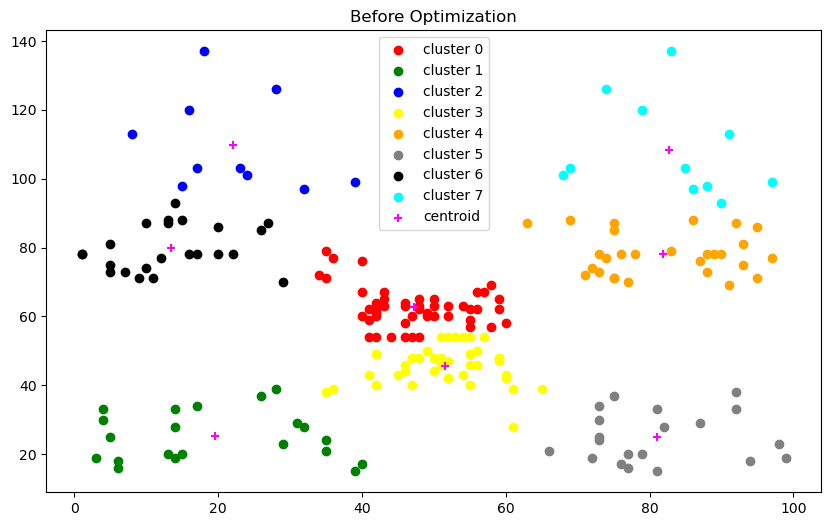

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(df0.score,df0.income,color='Red',label='cluster 0')
plt.scatter(df1.score,df1.income,color='Green',label='cluster 1')
plt.scatter(df2.score,df2.income,color='blue',label='cluster 2')
plt.scatter(df3.score,df3.income,color='yellow',label='cluster 3')
plt.scatter(df4.score,df4.income,color='orange',label='cluster 4')
plt.scatter(df5.score,df5.income,color='grey',label='cluster 5')
plt.scatter(df6.score,df6.income,color='black',label='cluster 6')
plt.scatter(df7.score,df7.income,color='cyan',label='cluster 7')
plt.scatter(centroid[:,0],centroid[:,1], color='magenta',marker='+',label='centroid')
plt.title('Before Optimization')
plt.legend()

# Objective Function

In [97]:
from PIL import Image
im=Image.open('obj.png')
im.show()

In [72]:
km.inertia_

25061.304119069333

# Optimizing KMEANS

In [77]:
wcss=[]
cluster= range (1,15)

for k in cluster:
    km2=KMeans(n_clusters=k)
    km2.fit(df[['score','income']])
    wcss.append(km2.inertia_)

In [78]:
wcss

[269981.28,
 182440.30762987013,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 30552.71402546729,
 25034.41239412761,
 21838.863692828912,
 19755.619860833405,
 17845.953195823782,
 15845.619372815676,
 14534.34955929586,
 12899.063008285353]

Text(0, 0.5, 'WCSS')

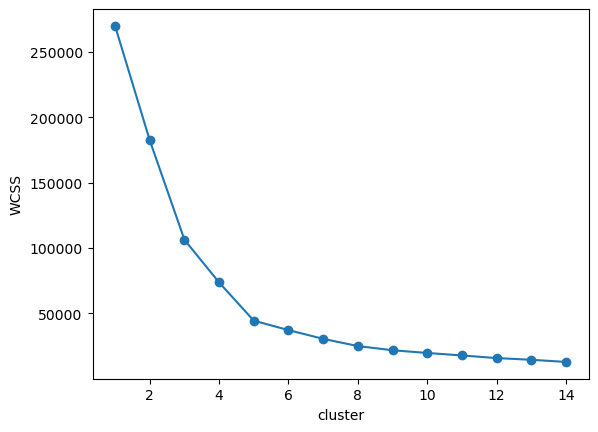

In [80]:
plt.plot(range(1,15),wcss,marker='o') #line plot
plt.xlabel('cluster')
plt.ylabel('WCSS')

In [83]:
!pip install kneed

In [84]:
from kneed import KneeLocator

In [85]:
kn=KneeLocator(cluster,wcss,direction='decreasing',curve='convex')

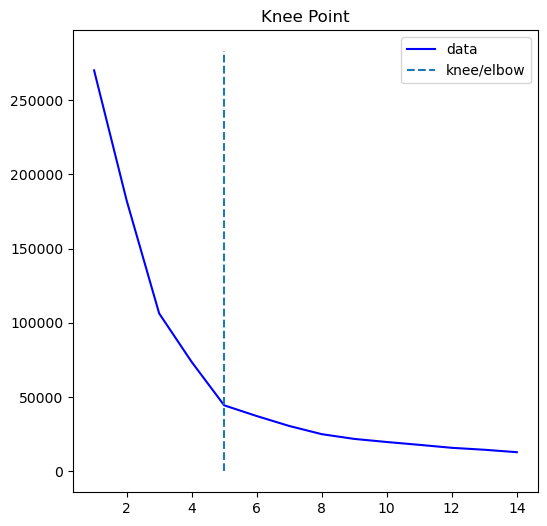

In [86]:
kn.plot_knee()

In [87]:
kn.knee

5

# After Optimizing

In [88]:
km=KMeans(n_clusters=5) #  i konow 5 is optimal
df['Group2']=km.fit_predict(df[['score','income']]) #fit predict

In [89]:
df.head()

,age,income,score,Group 1,Group1,Group2
0,19,15,39,1,1,3
1,21,15,81,5,5,4
2,20,16,6,1,1,3
3,23,16,77,5,5,4
4,31,17,40,1,1,3


In [94]:
cen=km.cluster_centers_
cen

array([[49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273]])

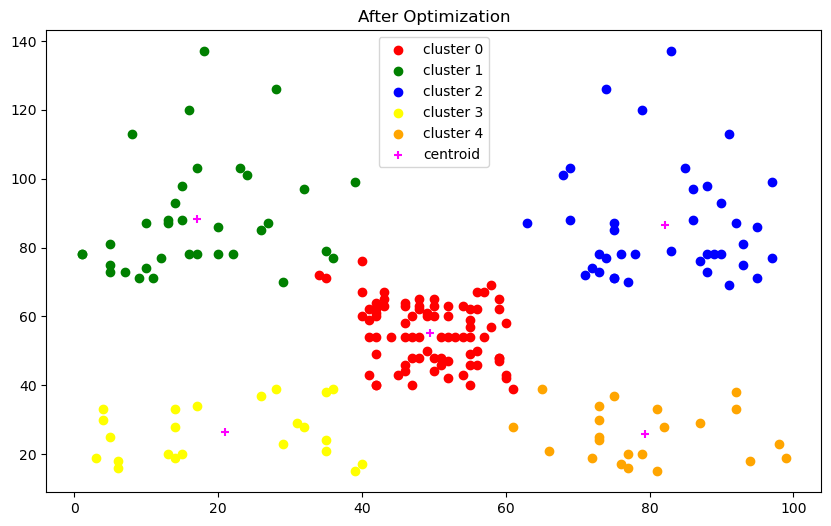

In [96]:
df0 = df[df.Group2 == 0]
df1 = df[df.Group2 == 1]
df2 = df[df.Group2 == 2]
df3 = df[df.Group2 == 3]
df4 = df[df.Group2 == 4]

plt.figure(figsize=(10,6))
plt.scatter(df0.score,df0.income,color='Red',label='cluster 0')
plt.scatter(df1.score,df1.income,color='Green',label='cluster 1')
plt.scatter(df2.score,df2.income,color='blue',label='cluster 2')
plt.scatter(df3.score,df3.income,color='yellow',label='cluster 3')
plt.scatter(df4.score,df4.income,color='orange',label='cluster 4')

plt.scatter(cen[:,0],cen[:,1], color='magenta',marker='+',label='centroid')

plt.title('After Optimization')

plt.legend()